## <font color="0000ff"> Análise de Sinais pela DFT</font>

Vamos estudar como analisar as componentes de frequências de um sinal $x(n)$ usando a sua DFT $X[k]$. Para tanto, devemos lembrar que a DFT de tamanho $N$ é realizada tomando amostras, igualmente espaçadas de $\frac{2\pi}{N}$ da transformada de Fourier no Tempo Discreto $X(e^{j\omega})$.

É sabido da literatura que a quantidade de amostras $N$ (ou tamanho da DFT) para um sinal limitado com $L$ posições deve ser $N \geq L$, e caso o sinal não tenha tamanho finito ou seja muito longo, devemos processá-lo em blocos, e tratar as interações entre os blocos (como feito no *Overlapp-add* por exemplo).

O fato de lidarmos com um sinal limitado no tempo traz um efeito conhecido com vazamento (*leakage*). Uma forma de analisar esse fato é considerar que um sinal $x(n)$ com $L$ posições, pode ser visto como a multiplicação de um sinal $x_o(n)$ $0 \leq n < \infty$ por uma sinal limitador $w(n)$ denominado de janela  de $L$ posições, assim $x(n) = x_o(n)w(n)$. Aplicando a Transformada de Fourier temos
$$ X(e^{j\omega}) = X_o(e^{j\omega})*W(e^{j\omega}).$$

Se a janela for quadrada, isto é,
$$ w(n) = \left\{\begin{matrix}1,\ 0 \leq n <N \\ 0,\ caso\ contrário\end{matrix}\right.$$ sua Transformada de Fourier é uma $sinc(\omega)$, como representado a seguir.

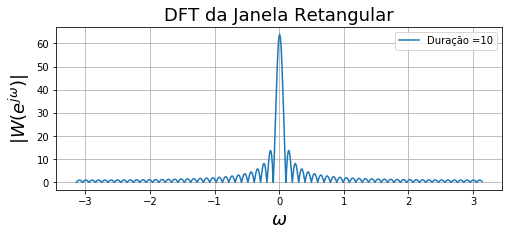

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 #Tamanho da janela

wn = np.ones(L)

WN = scp.fft(wn,512)

# Faz um deslocamento nas frequências
WN_shifted = np.fft.fftshift(WN)

fig,ax=plt.subplots()
fig.set_size_inches((8,3))
eixo_x = np.linspace(-np.pi,np.pi,512)
                  
ax.plot(eixo_x, abs(WN_shifted),label='Duração =10')
ax.set_xlabel('$\omega$',fontsize=18)
ax.set_ylabel(r'$|W(e^{j\omega})|$',fontsize=18)
ax.set_title('DFT da Janela Retangular',fontsize=18)
ax.grid()
ax.legend(loc=0);

Dessa forma, ao calcular a DFT de $x(n)$ obtemos $X(e^{j\omega})$ convoluido com $W(e^{j\omega})$ haverá "vazemento" de energia para as laterais da componentes em frequência de $x(n)$. Por exemplo, sendo $x(n) = \cos(4n)$, se limitarmos a $L$ pontos obtemos o espectro representado abaixo

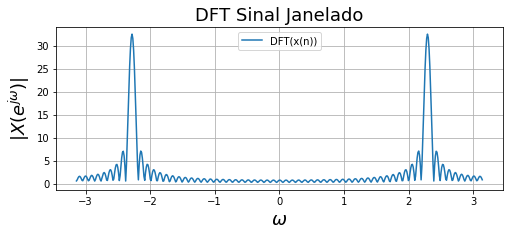

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 # Quantidade de pontos no sinal

fig,ax=plt.subplots()
fig.set_size_inches((8,3))

n = np.arange(0,L)

xn = np.cos(4*n)#.w(n)


Xomega = scp.fft(xn,512)
XOmegaShifted = np.fft.fftshift(Xomega)

eixo_x = eixo_x = np.linspace(-np.pi,np.pi,512)

ax.plot(eixo_x, abs(XOmegaShifted),label='DFT(x(n))')
ax.set_xlabel('$\omega$',fontsize=18)
ax.set_ylabel(r'$|X(e^{j\omega})|$',fontsize=18)
ax.set_title('DFT Sinal Janelado',fontsize=18)
ax.grid()
ax.legend(loc=0);

Observe que na Figura acima aparecem os picos correspondentes às frequências de $x(n)$, e outras componentes nas frequências adjacentes, justamente o vazamento provocado pela convolução.

Fazendo a DFT de tamanho $N = 512$ obtemos

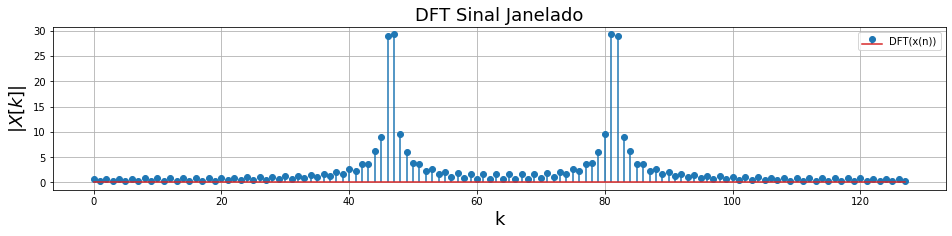

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 # Quantidade de pontos no sinal
N = 128 # Tamanho da DFT

fig,ax=plt.subplots()
fig.set_size_inches((16,3))

n = np.arange(0,L)

xn = np.cos(4*n)
Xomega = scp.fft(xn, N)


ax.stem(abs(Xomega),label='DFT(x(n))',use_line_collection=True,)
ax.set_xlabel('k',fontsize=18)
ax.set_ylabel(r'$|X[k]|$',fontsize=18)
ax.set_title('DFT Sinal Janelado',fontsize=18)
ax.grid()
ax.legend(loc=0);

Para reduzir o efeito do vazamento pode-se aumentar o tamanho da janela $L$, ou utilizar uma função $w(n)$ cujas componentes em frequências sejam mais concentradas. Como exemplo, considerar a Janela de Hanning:
$$ w(n) = \left\{\begin{matrix} 0,5 - 0,5\cos(\frac{2\pi n}{N-1}),& 0 \leq n < N \\ 0 & caso\ contrário.\end{matrix}\right.$$
representada a seguir.

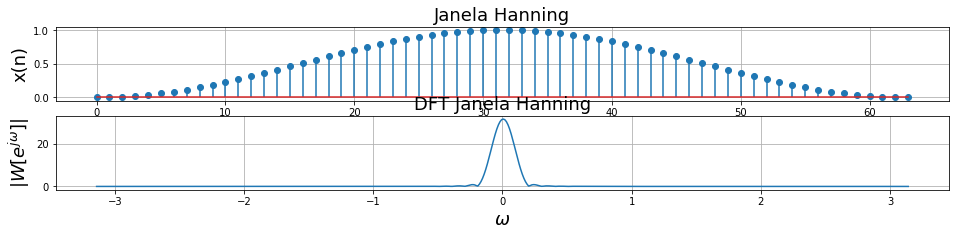

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 # Tamanho da Janela

fig,ax=plt.subplots(2)
fig.set_size_inches((16,3))

n = np.arange(0,L)

wn = 0.5 - 0.5*np.cos(2*np.pi*n/(L-1))

WN = scp.fft(wn,512)

# Faz um deslocamento nas frequências
WN_shifted = np.fft.fftshift(WN)
eixo_x = np.linspace(-np.pi,np.pi,512)

ax[0].stem(wn,label='DFT(x(n))',use_line_collection=True,)
ax[0].set_xlabel('n',fontsize=18)
ax[0].set_ylabel('x(n)',fontsize=18)
ax[0].set_title('Janela Hanning',fontsize=18)
ax[0].grid()
ax[1].plot(eixo_x, abs(WN_shifted),label='DFT(x(n))')
ax[1].set_xlabel('$\omega$',fontsize=18)
ax[1].set_ylabel('$|W[e^{j\omega}]$|',fontsize=18)
ax[1].set_title('DFT Janela Hanning',fontsize=18)
ax[1].grid()

#ax[0].legend(loc=0);

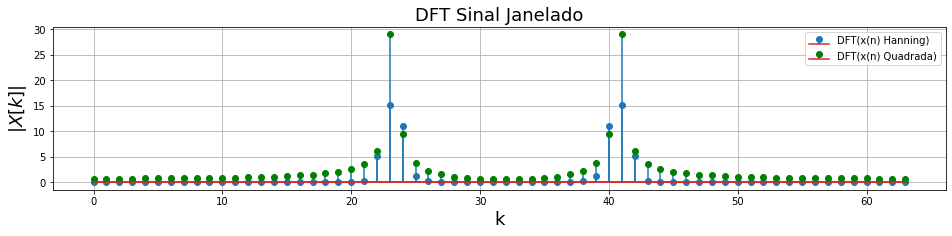

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

L = 64 # Quantidade de pontos no sinal
N = 64 # Tamanho da DFT

fig,ax=plt.subplots()
fig.set_size_inches((16,3))

n = np.arange(0,L)

wn = 0.5 - 0.5*np.cos(2*np.pi*n/(L-1))

xn = np.cos(4*n)

#Descomentar se quiser fazer a comparação com a janela quadrada
Xquadrada = scp.fft(xn,N)    

xnj = xn*wn   #*(0.5 - 0.5*np.cos(2*np.pi*n/(L-1))
                  
Xomega = scp.fft(xnj, N)

ax.stem(abs(Xomega),label='DFT(x(n) Hanning)',use_line_collection=True,)
ax.set_xlabel('k',fontsize=18)
ax.set_ylabel(r'$|X[k]|$',fontsize=18)
ax.set_title('DFT Sinal Janelado',fontsize=18)
ax.grid()
#Descomentar se quiser fazer a comparação com a janel quadrada
ax.stem(abs(Xquadrada),markerfmt='go',label='DFT(x(n) Quadrada)',use_line_collection=True,)
ax.legend(loc=0);

Existem outras janelas como as de Hamming, Kaiser, Blackman e outras.

### <font color="0000ff"> Resolução Espectral</font>


A FFT pode ser vista como um conjunto de $N$ amostras do espectro de frequência $X(e^{j\omega})$ de um sinal $x(n)$, tomadas a intervalos $\omega_k = \frac{2\pi.k}{N}$. 

A sequência $x(n)$ foi obtida pela amostragem de um sinal analógico $x(t)$ a uma frequência de amostragem $F_s$. A conversão da frequência do sinal analógico $f$ para o sinal no tempo discreto $\omega$ é dada por $\omega = \frac{2\pi f}{F_s}$.

Então podemos igualhar a $k$-ésima amostra em frequência obtida pela FFT a componente $f_k$ do sinal analógico, ou seja $$\frac{2\pi f_k}{F_s} = \frac{2\pi.k}{N}$$ então $$f_k = \frac{F_s.k}{N}.$$

Se considerarmos as componentes representadas nos $k$ e $k-$ bins (posições das amostras de $W(e^{j\omega}$) da FFT, temos que a resolução em frequência pode ser calculada por $$\Delta_f = f_{k+1} - f_k = \frac{F_s(k+1)}{N} - \frac{F_s.k}{N}$$ o que nos dá $$\Delta_f = \frac{F_s}{N}.$$

Essa resolução em frequência $\Delta_f$ indica que componentes do sinal analógico com distância menor que esse valor não serão registradas pela FFT. Ou seja, uma frequência $\omega_k$ esteja localizada exatamente entre as amostradas tomadas em $\frac{2\pi (k-1)}{N}$ e $\frac{2\pi (k+1)}{N}$ e portanto não será registrada.

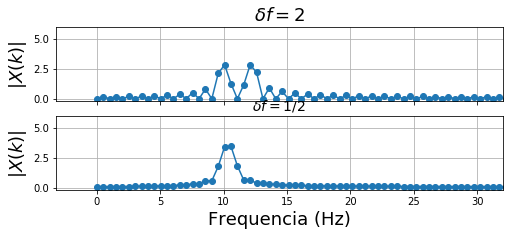

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

Nf = 128 # Tamanho da FFT
fs = 64 # Freqência de Amosrtagem
f = 10  # Frequência do sinal
t = np.arange(0,1,1/fs) # amostras no tempo discreto
deltaf = 1/2. # Ditância entre as frequências

fig,ax = plt.subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((8,3))

x=np.cos(2*np.pi*f*t) + np.cos(2*np.pi*(f+2)*t) # 2 Hz diferença de frequência
X = scp.fft(x,Nf)/np.sqrt(Nf)
ax[0].plot(np.linspace(0,fs,Nf),abs(X),'-o')
ax[0].set_title(r'$\delta f = 2$',fontsize=18)
ax[0].set_ylabel(r'$|X(k)|$',fontsize=18)
ax[0].grid()

x = np.cos(2*np.pi*f*t) + np.cos(2*np.pi*(f+deltaf)*t) # delta_f de diferença de frequência

X = scp.fft(x,Nf)/np.sqrt(Nf)
ax[1].plot(np.linspace(0,fs,Nf),abs(X),'-o')
ax[1].set_title(r'$\delta f = 1/2$',fontsize=14)
ax[1].set_ylabel(r'$|X(k)|$',fontsize=18)
ax[1].set_xlabel('Frequencia (Hz)',fontsize=18)
ax[1].set_xlim(xmax = fs/2)
ax[1].set_ylim(ymax=6)
ax[1].grid()

Nesse caso, uma das soluções é aumentar o tamanho da FFT até que o intervalo entre as frequências seja detectável. Pode-se ainda utilizar outros métodos que são conhecidos como estimação do espectro, esse métodos utilizam estatísticas do sinal para obter sua representação espectral.

## Gráfico *Waterfall*

Qualquer (tempo contínuo ou discret) tranformada de Fourier apresenta as componentes de frequência de um sinal de forma instantânea. Caso as componentes de frequência do sinal mude com o tempo, deve-se aplicar transformadas em determinados intervalos de tempo e representá-las de forma sucessiva. Esse gráfico é conhecido com *Waterfall*, e está representado genericamente na Figura abaixo para a faixa de frequência de 980 a 1260 MHz denominando para fins de representação o intervalor entre $X[k]$ e $X[k+1]$ como um canal (Ch).


![title](./Figuras/bingo2.jpeg)

Na Figura a seguir tem-se um *Waterfall* para o espectro da radiação solar.

![title](./Figuras/heatmap1.jpeg)